In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [29]:
X,Y = make_blobs(n_samples=500,n_features=2,centers=3,random_state=3)

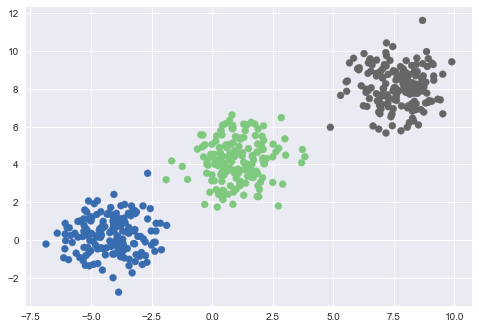

In [30]:
plt.style.use('seaborn')
plt.figure(0)
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.show()

In [47]:
k = 3
color = ['green', 'red','blue','yellow','orange']
clusters = {}
for i in range(k):
    center = 10*(2*np.random.random((X.shape[1],1))-1)
    points = []
    cluster = {
        'center':center,
        'points': points,
        'color': color[i]
    }
    clusters[i] = cluster

In [40]:
print(clusters)

{0: {'center': array([[ 2.47443869],
       [-5.56859972]]), 'points': [], 'color': 'green'}, 1: {'center': array([[ 6.55169199],
       [-5.97071373]]), 'points': [], 'color': 'red'}, 2: {'center': array([[-2.72325324],
       [-7.06627548]]), 'points': [], 'color': 'blue'}}


In [41]:
def distance(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))

def assignPointsToClusters(clusters): # E-Step
    for ix in range(X.shape[0]):
        dist = []
        curr_x = X[ix]
        for kx in range(k):
            d = distance(curr_x,clusters[kx]['center'])
            dist.append(d)
        current_cluster = np.argmin(dist)
        clusters[current_cluster]['points'].append(curr_x)

def updateClusters(clusters):# M-Step
    for kx in range(k):
        pts = np.array(clusters[kx]['points'])

        if pts.shape[0]>0:
            new_mean = pts.mean(axis=0)
            clusters[kx]['center'] = new_mean
            clusters[kx]['points'] = []

def plotClusters(clusters):
    for kx in range(k):
        pts = np.array(clusters[kx]['points'])
        try:
            plt.scatter(pts[:,0],pts[:,1],color=clusters[kx]['color'])
        except:
            pass

        uk = clusters[kx]['center']
        plt.scatter(uk[0],uk[1],color='black',marker='o')
    plt.show()

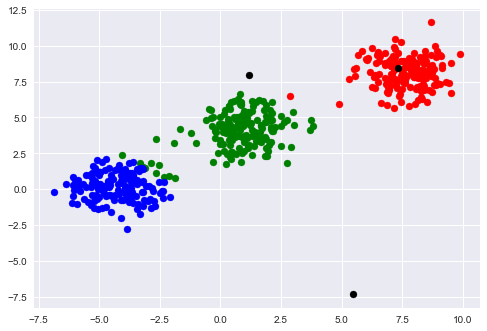

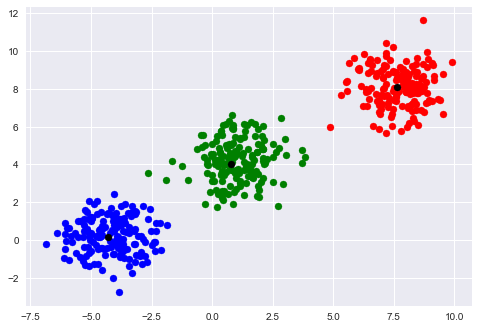

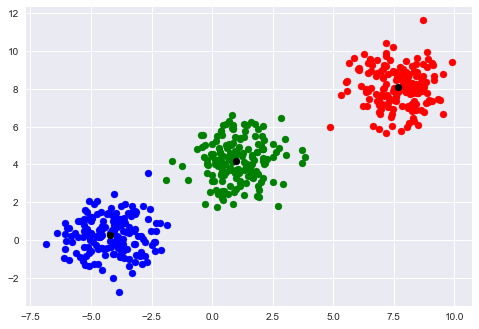

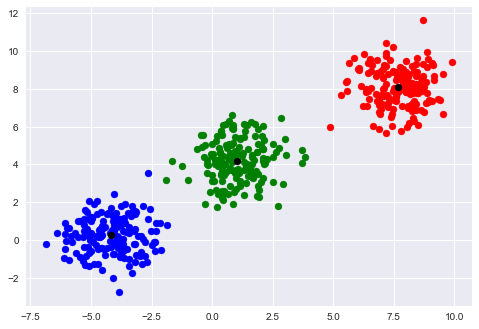

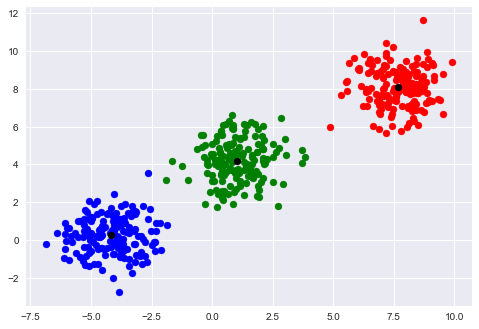

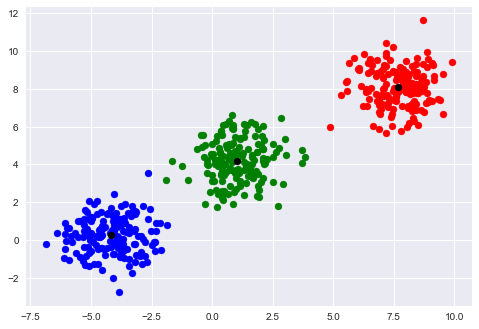

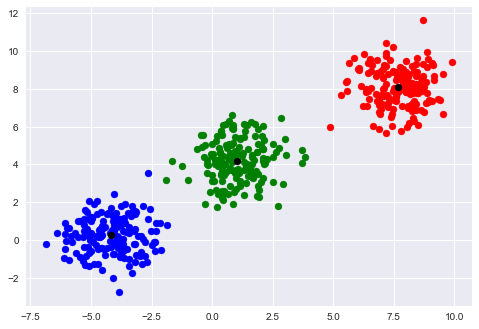

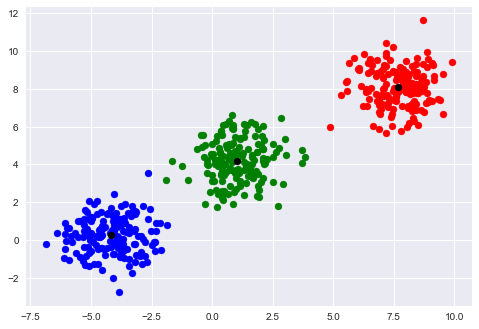

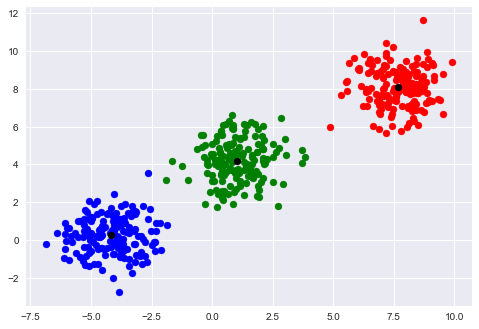

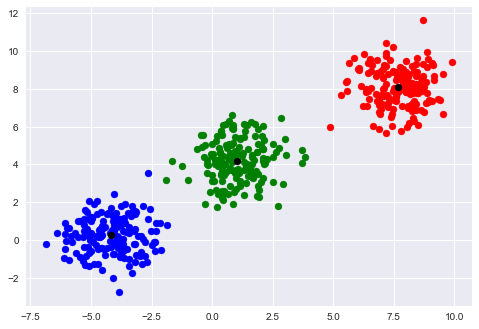

In [48]:
for i in range(10):
    assignPointsToClusters(clusters)
    plotClusters(clusters)
    updateClusters(clusters)